## Play-ground to make initial data distributions.

In [7]:
#import Pkg; Pkg.add("Distributions")
using Distributions
using Plots
import Pkg; Pkg.add("JLD2")
using FileIO
using JLD2
Pkg.instantiate()

Error encountered while save File{DataFormat{:JLD2}, String}("par_dis_L100_N4_5_vp_3.jld2").

Fatal error:
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
   Installed JLD2 ─ v0.4.17
    Updating `~/.julia/environments/v1.7/Project.toml`
  [033835bb] + JLD2 v0.4.17
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [033835bb] + JLD2 v0.4.17
  [3bb67fe8] + TranscodingStreams v0.9.6
Precompiling project...
  ✓ TranscodingStreams
  ✓ JLD2
  2 dependencies successfully precompiled in 5 seconds (271 already precompiled)


### This is a Maxwellinan distribution (3D) centered around v=0 and with m/kT = 1

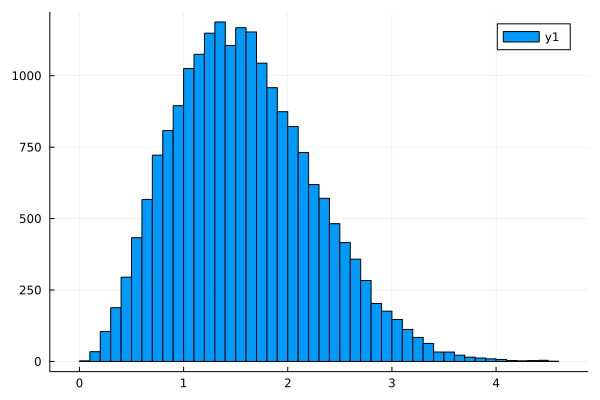

In [4]:
d  = LocationScale(0.0,1.,Chi(3))
data = rand(d,20000);
histogram(data)

The 1D distribution for $\frac{m}{kT} = 1$ is just the normal distribution centered at both $\pm v_p$. With $\sigma = 1$.


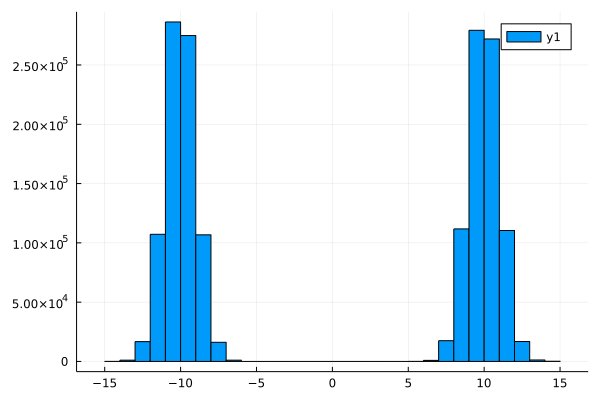

In [14]:
N = 40000
vb = -10

data_n = [rand(Normal(-vb,1),N÷2); rand(Normal(vb,1),N÷2)]  #.+ rand(Normal(-1,1),20000)
histogram(data_n, bins=:scott, weights=repeat(1:80, outer=500))

### This is the distribution on the course, just to check that it is the same... 

I should apply some statistics here and check different momenta :-)

In [17]:
"""The following routine returns a random velocity distributed on a double Maxwellian distribution function corresponding to two counter-streaming beams. The algorithm used to achieve this is called the rejection method, and will be discussed later in this course.

  // Function to distribute electron velocities randomly so as 
  // to generate two counter propagating warm beams of thermal
  // velocities unity and mean velocities +/- vb.
  // Uses rejection method.
"""
function distribution(vb)
  #Generate random v value
  fmax = 0.5 * (1. + exp(-2.0 * vb * vb));
  vmin = - 5.0 * vb;
  vmax = + 5.0 * vb;
  v = vmin + (vmax - vmin) * (rand());

  #  Accept/reject value
  f = 0.5 * (exp(-(v - vb) * (v - vb) / 2.0) + exp(-(v + vb) * (v + vb) / 2.0))
  x = fmax * rand()
  if (x > f) return distribution(vb)
  else return v
  end
end

distribution

In [18]:
v = zeros(N)
for i in 1:N
    v[i] = distribution(vb)
end

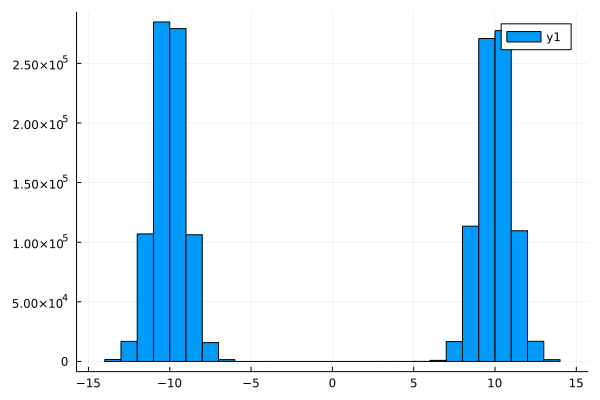

In [19]:
histogram(v, bins=:scott, weights=repeat(1:80, outer=500))

At first sigth they look very similar....

We now make and save some distributions to use as standard ones.

In [10]:
L = 100 #length of integration region
#N = 200000
N = 80000 #even number
vb = 3

r = L*rand(N);
vp = rand(Normal(vb,1),N÷2);
u = [r; -vp; vp];

save("par_dis_L100_N8_5_vp_3.jld2", "par_dis", u)